### Least Square Method on inbuilt data

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [7]:
features = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'])
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
features.shape

(506, 13)

In [9]:
target = pd.DataFrame(target, columns=['Target'])
target.head()

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [45]:
#The baseline(naive) model using mean of the target

In [46]:
mean_output = target['Target'].mean()
mean_output

22.532806324110698

In [10]:
#Squared Error
squared_error = pd.Series(mean_output-target['Target'])**2
print(squared_error)

0        2.152657
1        0.870128
2      148.040602
3      118.095898
4      186.792183
          ...    
501      0.017638
502      3.735740
503      1.869219
504      0.283883
505    113.056570
Name: Target, Length: 506, dtype: float64


In [12]:
sum_squared_error = np.sum(squared_error)
print(sum_squared_error)

42716.29541501976


If you consider mean as your prediction then the Sum Squared Error is 42716.295

<AxesSubplot:ylabel='Frequency'>

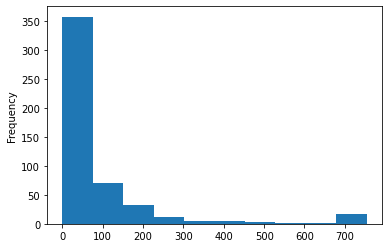

In [11]:
squared_error.plot(kind = 'hist')

#### Now I AM Going to Do some Smart Work - Machine Intelligence

In [13]:
## Using the Least Square method

In [17]:
X = features[['RM']]
y = target[['Target']]

In [18]:
print(X.shape, y.shape)

(506, 1) (506, 1)


In [24]:
X = sm.add_constant(X)

In [25]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [26]:
linear_regression = sm.OLS(y,X)

In [27]:
#Estimation of coefficients
model = linear_regression.fit()

In [43]:
# Run this cell in case if you want to run through smf module
# data_sm = pd.DataFrame(np.vstack((X.RM.values, y.Target.values))).T
# data_sm.columns = ['RM', 'Target']
# data_sm.head()

In [44]:
#In case if you want to use smf
# linear_regression = smf.ols(formula='Target ~ RM', data=data_sm)
# model = linear_regression.fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           2.49e-74
Time:                        01:50:15   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Let us compare the results

In [38]:
predicted_values = model.predict(X)

In [39]:
SSE_on_mean = np.sum((target['Target'] - target['Target'].mean())**2)
SSE_on_OLS = np.sum((target['Target'] - predicted_values)**2)

In [40]:
print('Error using Mean : ',SSE_on_mean)
print('Error using OLS : ', SSE_on_OLS)

Error using Mean :  42716.29541501976
Error using OLS :  22061.879196211798


<AxesSubplot:ylabel='Frequency'>

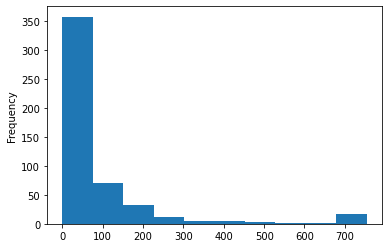

In [41]:
squared_error = pd.Series((target['Target'] - target['Target'].mean()))**2
squared_error.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

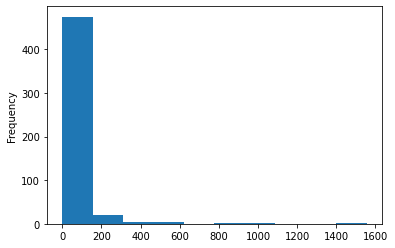

In [42]:
squared_error_ols = pd.Series((target['Target'] - predicted_values))**2
squared_error_ols.plot(kind = 'hist')

In [43]:
# Guess this is what ???
(SSE_on_mean-SSE_on_OLS)/SSE_on_mean

0.4835254559913341

#### TASK

Use the Advertising.csv shared yesterday in your drive to build three different OLS models. One using TV as features or input and sales as target and the other model using Radio as features and sales as target and then the newspaper as input and sales as target and compare their R squared values

